In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Diabetes.csv.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df=pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#check the file size
import os
file_name = r"C:\Users\IDEH\Desktop\datasets\Diabetes.csv.csv"
file_stats = os.stat(file_name)
print(file_stats)
#
print(f'\nFile Size in MegaBytes is {file_stats.st_size / (1024 * 1024)}')

os.stat_result(st_mode=33206, st_ino=70087269201056319, st_dev=5120994, st_nlink=1, st_uid=0, st_gid=0, st_size=23873, st_atime=1685821434, st_mtime=1679478374, st_ctime=1679478374)

File Size in MegaBytes is 0.022767066955566406


import matplotlib.pyplot as plt
df.groupby('Pregnancies').size().plot(kind='pie', autopct='%.2f')

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
import seaborn as sns

In [9]:
#sns.pairplot(df)

In [10]:
#sns.pairplot(df,hue='Outcome')

# Train Test Split

In [11]:
x=df.drop(['Outcome'],axis=1)
#x=df[['Glucose']]

In [12]:
y=df['Outcome']

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.3, random_state=132)

# Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression()

In [16]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [17]:
from sklearn.metrics import r2_score

In [18]:
y_pred=lr.predict(xtest)

In [19]:
accuracy = r2_score(ytest,y_pred)


In [20]:
accuracy

0.24543744140460078

In [21]:
#there is no linear correlation

In [22]:
#using nbg model

# Naive Bayes Guassian

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
gaussian=GaussianNB()

In [25]:
gaussian.fit(xtrain,ytrain)

GaussianNB()

In [26]:
print("Naive Bayes score: ",gaussian.score(xtest,ytest))

Naive Bayes score:  0.7229437229437229


# Decision Tree


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
model=DecisionTreeClassifier(criterion='gini',max_depth=40,random_state=0)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=40, random_state=0)

In [29]:
y_model_pred=model.predict(xtest)
y_pred_train_model=model.predict(xtrain)
y_pred_train_model

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [30]:
from sklearn.metrics import accuracy_score
print('model accuracy score with criterion gini Index : {0:0.4f}'.format(accuracy_score(ytest,y_model_pred)))

model accuracy score with criterion gini Index : 0.7013


In [31]:
print('Training set score: {:.4f}'.format(model.score(xtrain, ytrain)))

print('Test set score: {:.4f}'.format(model.score(xtest, ytest)))

Training set score: 1.0000
Test set score: 0.7013


In [32]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(ytrain, y_pred_train_model)))

Training-set accuracy score: 1.0000


# Random Forrest

In [33]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0)
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision trees :{0:0.4f}'.format(accuracy_score(ytest,y_pred)))

Model accuracy score with 10 decision trees :0.7446


In [34]:
#second approach

In [35]:
model2=RandomForestClassifier(n_estimators=100,random_state=0)

In [36]:
model2.fit(xtrain,ytrain)

RandomForestClassifier(random_state=0)

In [37]:
y_pred_100=model2.predict(xtest)
print('Model accuracy score with 100 decision trees :{0:0.4f}'.format(accuracy_score(ytest,y_pred_100)))

Model accuracy score with 100 decision trees :0.7446


In [38]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# PCA + Logistic Regression

In [39]:
from sklearn import preprocessing

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain), columns = x.columns)

xtest = pd.DataFrame(scaler.transform(xtest), columns = x.columns)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
y_pred = logreg.predict(xtest)

In [42]:
print('Logistic Regression accuracy score with all the features:\n {0:0.4f}'. format(accuracy_score(ytest, y_pred)))

Logistic Regression accuracy score with all the features:
 0.7489


# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)

In [45]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [46]:
predknn = knn.predict(xtest)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(confusion_matrix(ytest,predknn))

[[122  28]
 [ 43  38]]


In [49]:
print(classification_report(ytest,predknn))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       150
           1       0.58      0.47      0.52        81

    accuracy                           0.69       231
   macro avg       0.66      0.64      0.65       231
weighted avg       0.68      0.69      0.68       231



In [50]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

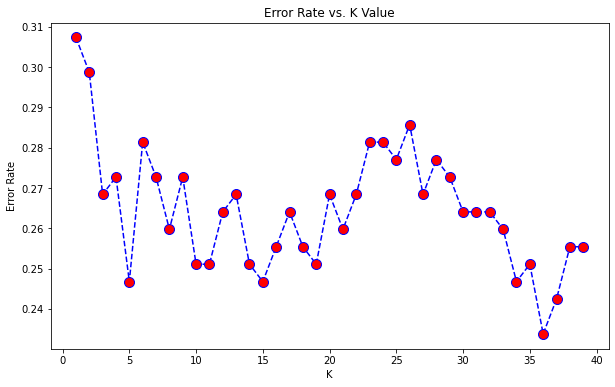

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [52]:
# NOW WITH K=36
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(xtrain,ytrain)
predknn2 = knn.predict(xtest)

print('WITH K=36')
print('\n')
print(confusion_matrix(ytest,predknn2))
print('\n')
print(classification_report(ytest,predknn2))

WITH K=36


[[145   5]
 [ 49  32]]


              precision    recall  f1-score   support

           0       0.75      0.97      0.84       150
           1       0.86      0.40      0.54        81

    accuracy                           0.77       231
   macro avg       0.81      0.68      0.69       231
weighted avg       0.79      0.77      0.74       231





# NEW DATASET

In [53]:
newdata=pd.read_csv('diabetes.csv')

In [54]:
newdata

,Date,Time,Code,Value
0,4/21/1991,9:09,58,100
1,4/21/1991,9:09,33,9
2,4/21/1991,9:09,34,13
3,4/21/1991,17:08,62,119
4,4/21/1991,17:08,33,7
...,...,...,...,...
16493,11/8/1989,7:00,66,0
16494,11/8/1989,12:00,66,0
16495,11/8/1989,17:00,66,0
16496,11/8/1989,21:30,66,0


In [55]:
ndf=pd.DataFrame(newdata)

In [56]:
# f = plt.figure(figsize=(19, 15))
# plt.matshow(ndf.corr(), fignum=f.number)
# plt.xticks(range(ndf.select_dtypes(['number']).shape[1]), ndf.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(ndf.select_dtypes(['number']).shape[1]), ndf.select_dtypes(['number']).columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x2=ndf.Code
y2=ndf.Value
x2.values.reshape(-1,1)
y2.values.reshape(-1,1)

array([['100'],
       ['9'],
       ['13'],
       ...,
       ['0'],
       ['0'],
       ['0']], dtype=object)

In [59]:
xtrain2,ytrain2,xtest2,ytest2 = train_test_split(x2,y2,test_size=.15)